In [100]:
import yaml 
import matplotlib.pyplot as plt
import numpy as np
import glob


In [114]:
ours_results_c4 = [13.911,10.169947624206543]
ours_results_wiki2 = [11.138714,8.044749]
ours_n = [2,4]
ours_m = [4,8]

paths = glob.glob("/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/sparse/*/results.yaml")

for path in paths:
    structure = path.split("/")[-2].split("_")[1:]
    n = int(structure[0])
    m = int(structure[1])
    
    with open(path, "r") as f:
        results = yaml.safe_load(f)
        ours_results_c4.append(results["ppl"]["c4"])
        ours_results_wiki2.append(results["ppl"]["wikitext2"])
        ours_n.append(n)
        ours_m.append(m)
        

ours_results_c4 = [x for _, x in sorted(zip(ours_n, ours_results_c4))]
ours_results_wiki2 = [x for _, x in sorted(zip(ours_n, ours_results_wiki2))]
ours_n = sorted(ours_n)
ours_m = sorted(ours_m)

#drop the last one
ours_results_c4 = ours_results_c4[:-1]
ours_results_wiki2 = ours_results_wiki2[:-1]
ours_n = ours_n[:-1]
ours_m = ours_m[:-1]

    

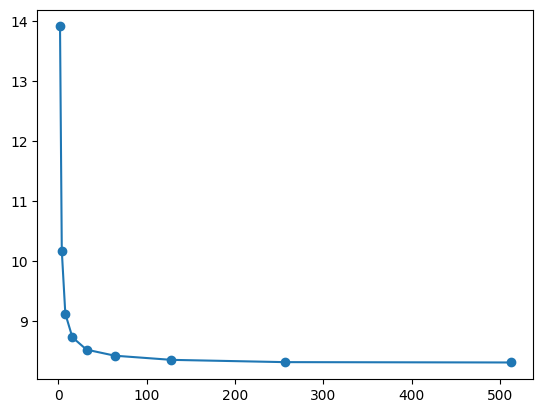

In [115]:
plt.plot(ours_n, ours_results_c4, label="Ours C4", marker='o')

In [116]:
sparsegpt_results_c4 = []
sparsegpt_results_wiki2 = []
sparsegpt_n = []
sparsegpt_m = []

#example_path: /data/lliu/wanda/out/llama-2-7b/8:16/sparsegpt/evals.yaml

paths = glob.glob("/data/lliu/wanda/out/llama-2-7b/*/sparsegpt/evals.yaml")
for path in paths:
    print(path)
    structure = path.split("/")[-3]
    if ":" in structure:
        structure = structure.split(":")
    elif "-" in structure:
        structure = structure.split("-")
    else:
        print(f"Invalid path structure: {path}")
        continue
    n = int(structure[0])
    m = int(structure[1])
    
    with open(path, "r") as f:
        results = yaml.load(f, Loader=yaml.Loader)
        sparsegpt_results_c4.append(results["ppl"]["c4"])
        sparsegpt_results_wiki2.append(results["ppl"]["wikitext2"])
        sparsegpt_n.append(n)
        sparsegpt_m.append(m)
        
sparsegpt_results_c4 = [x for _, x in sorted(zip(sparsegpt_n, sparsegpt_results_c4))]
sparsegpt_results_wiki2 = [x for _, x in sorted(zip(sparsegpt_n, sparsegpt_results_wiki2))]
sparsegpt_n = sorted(sparsegpt_n)
sparsegpt_m = sorted(sparsegpt_m)
print(sparsegpt_n)
print(sparsegpt_results_c4)

/data/lliu/wanda/out/llama-2-7b/2-4/sparsegpt/evals.yaml
/data/lliu/wanda/out/llama-2-7b/32:64/sparsegpt/evals.yaml
/data/lliu/wanda/out/llama-2-7b/128:256/sparsegpt/evals.yaml
/data/lliu/wanda/out/llama-2-7b/unstructured/sparsegpt/evals.yaml
Invalid path structure: /data/lliu/wanda/out/llama-2-7b/unstructured/sparsegpt/evals.yaml
/data/lliu/wanda/out/llama-2-7b/16:32/sparsegpt/evals.yaml
/data/lliu/wanda/out/llama-2-7b/64:128/sparsegpt/evals.yaml
/data/lliu/wanda/out/llama-2-7b/8:16/sparsegpt/evals.yaml
/data/lliu/wanda/out/llama-2-7b/4-8/sparsegpt/evals.yaml
[2, 4, 8, 16, 32, 64, 128]
[11.976911544799805, 9.730698585510254, 8.906292915344238, 8.620625495910645, 8.463777542114258, 8.375389099121094, 109295.078125]


In [117]:
wanda_results_c4 = []
wanda_results_wiki2 = []
wanda_n = []
wanda_m = []

#example_path: /data/lliu/wanda/out/llama-2-7b/8:16/wanda/evals.yaml

paths = glob.glob("/data/lliu/wanda/out/llama-2-7b/*/wanda/evals.yaml")
for path in paths:
    print(path)
    structure = path.split("/")[-3]
    if ":" in structure:
        structure = structure.split(":")
    elif "-" in structure:
        structure = structure.split("-")
    else:
        print(f"Invalid path structure: {path}")
        continue
    n = int(structure[0])
    m = int(structure[1])
    
    with open(path, "r") as f:
        results = yaml.load(f, Loader=yaml.Loader)
        wanda_results_c4.append(results["ppl"]["c4"])
        wanda_results_wiki2.append(results["ppl"]["wikitext2"])
        wanda_n.append(n)
        wanda_m.append(m)
wanda_results_c4 = [x for _, x in sorted(zip(wanda_n, wanda_results_c4))]
wanda_results_wiki2 = [x for _, x in sorted(zip(wanda_n, wanda_results_wiki2))]
wanda_n = sorted(wanda_n)
wanda_m = sorted(wanda_m)


/data/lliu/wanda/out/llama-2-7b/2-4/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/32:64/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/128:256/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/unstructured/wanda/evals.yaml
Invalid path structure: /data/lliu/wanda/out/llama-2-7b/unstructured/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/16:32/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/64:128/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/8:16/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/4-8/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/256:512/wanda/evals.yaml
/data/lliu/wanda/out/llama-2-7b/512:1024/wanda/evals.yaml


In [118]:
wanda_n

[2, 4, 8, 16, 32, 64, 128, 256, 512]

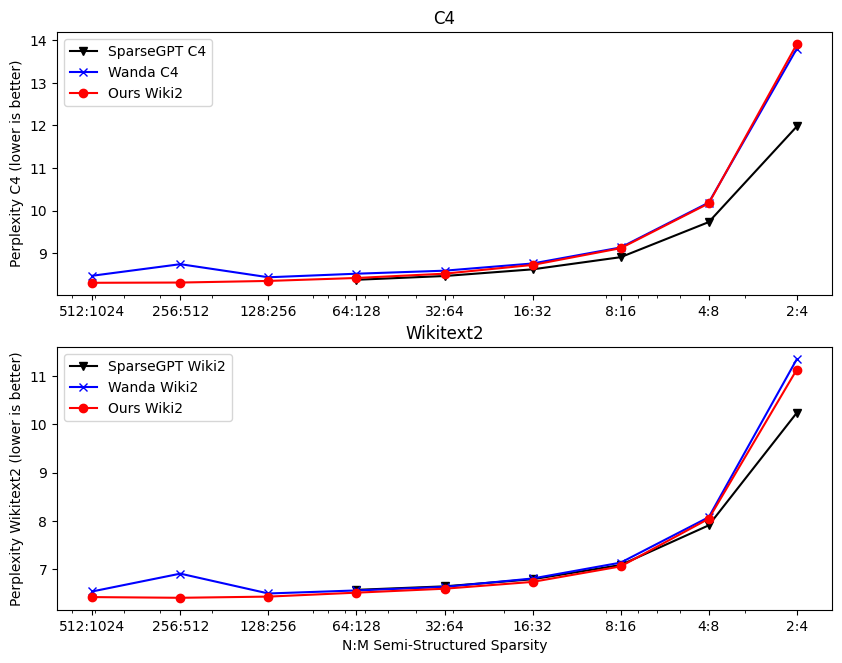

In [119]:
fig,axs = plt.subplots(2,1,figsize=(10,7.5))
plt.sca(axs[0])

plt.plot(sparsegpt_n[:-1], sparsegpt_results_c4[:-1], label="SparseGPT C4", marker='v',
         color = "black")
plt.plot(wanda_n, wanda_results_c4, label="Wanda C4", marker='x',
          color = "blue")
plt.plot(ours_n, ours_results_c4, label="Ours Wiki2", marker='o',
         color = "red")
axs[0].invert_xaxis()
# plt.ylim([7,15])
plt.xscale('log')
#set the correct x ticks
plt.xticks(ours_n, [f"{ours_n[i]}:{ours_m[i]}" for i in range(len(ours_n))])
# plt.yscale('log')
# plt.xlabel("N:M Semi-Structured Sparsity")
plt.ylabel("Perplexity C4 (lower is better)")
plt.title("C4")
plt.legend()


plt.sca(axs[1])

plt.plot(sparsegpt_n[:-1], sparsegpt_results_wiki2[:-1], label="SparseGPT Wiki2", marker='v',
            color = "black")
plt.plot(wanda_n, wanda_results_wiki2, label="Wanda Wiki2", marker='x',
            color = "blue")
plt.plot(ours_n, ours_results_wiki2, label="Ours Wiki2", marker='o',
            color = "red")
axs[1].invert_xaxis()
# plt.ylim([7,15])
plt.xscale('log')
#set the correct x ticks
plt.xticks(ours_n, [f"{ours_n[i]}:{ours_m[i]}" for i in range(len(ours_n))])
plt.xlabel("N:M Semi-Structured Sparsity")
plt.ylabel("Perplexity Wikitext2 (lower is better)")
plt.title("Wikitext2")
plt.legend()
plt.savefig("llama2_7b.png", dpi=300, bbox_inches='tight')


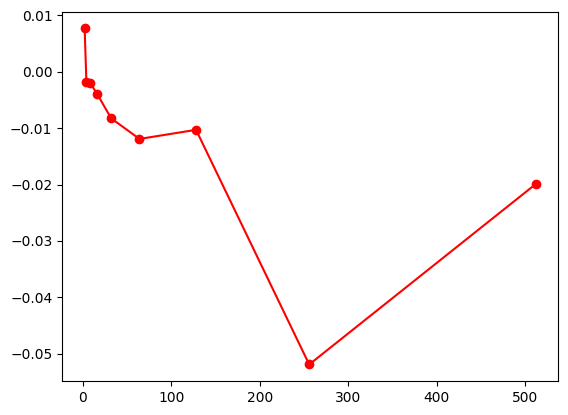

In [ ]:
plt.plot(ours_n,
         [(wanda_results_c4[i]-ours_results_c4[i] - )/ours_results_c4[i] for i in range(len(ours_n))],
         label="Ours vs Wanda C4", marker='o',
         color = "red")

In [99]:
#helper function for table generation
models = ["Llama-2-7b-hf",
          "Llama-2-13b-hf",
          "Llama-2-70b-hf",
          "Meta-Llama-3-8B",
        "Meta-Llama-3-70B"]

pattern = "2_4"

#example path /data/lliu/huffman/models/meta-llama/Llama-2-13b-hf/sparse/50unstructured/log.log

for m in models:
    log_path = f"../models/meta-llama/{m}/sparse/*{pattern}*/log.log"
    # print(log_path)
    paths = glob.glob(log_path)
    # print(paths)
    path = paths[0]

    #open the log file
    with open(path, "r") as f:
        lines = f.readlines()
        
        acc_sum = 0
        acc_count = 0
        for line in lines:
            if "|acc     |" in line:
                # print(line)
                # raise Exception("acc found")
                acc = float(line.split("|")[-4].strip())
                acc_sum += acc
                acc_count += 1
        print(round(acc_sum/acc_count*100, 2), end="")
    print(" & ", end="")

54.3 & 58.14 & 66.95 & 51.21 & 67.71 & 